## **---Ecommerce Customer Data Analysis----**

In [1]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing the data
dataset = pd.read_csv('Ecommerce Customers.csv')

In [3]:
dataset.head() #top5 records

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
dataset.tail() #bottom 5 records

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


On the initial study of the dataset we can understand that **"Yearly Amount Spent"** is the <span style="color:blue;">dependent variable</span> and **"Avg. Session Length",** **"Time on App",** **"Time on Website"** and **"Length of Membership"** are the important <span style="color:red;">independent variable</span> , while "Email" , "Avatar" and "Address" are not much important and they needs to be dropped.

In [5]:
dataset.describe() #Summary statistics of all the variables of numerical columns.

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
dataset.shape #No of rows and columns

(500, 8)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### -----Bivariate Analysis-----
Finding out the extent and relationship between two variables. Ideally we are checking the relationship of the IDV on DV.

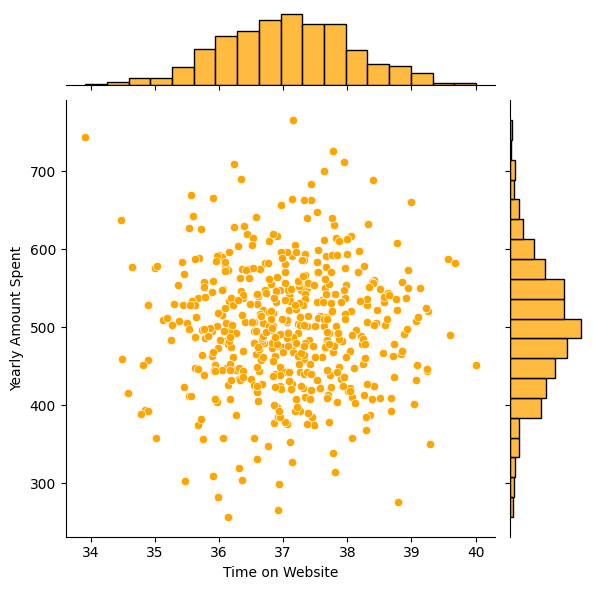

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=dataset, color='orange')

 **No Strong relation**

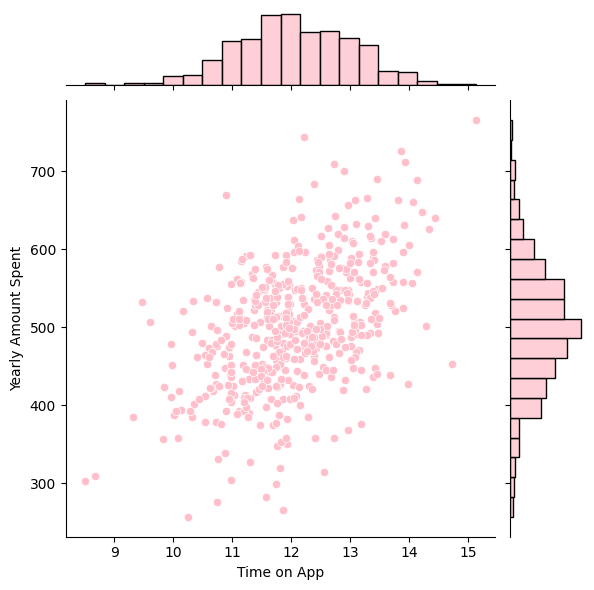

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=dataset, color='pink')

**Strong Relationship**, upward trend. The more time spent on app the more customer tend to spend yeraly.

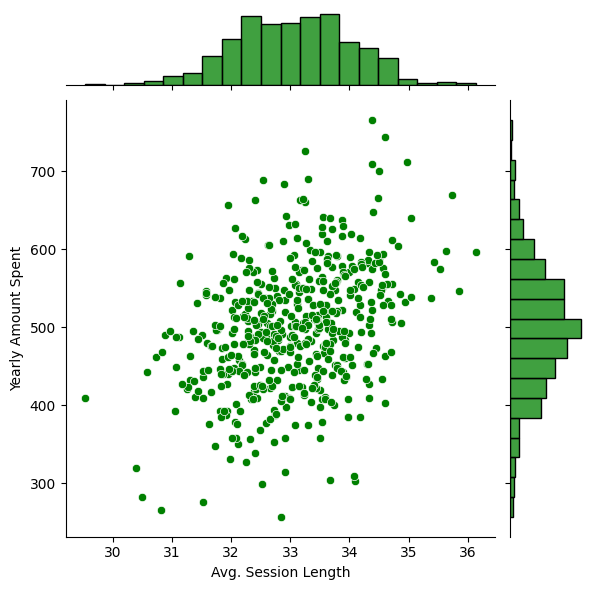

In [10]:
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=dataset, color='green')

**Strong relation** - rising trend. The more time spent by customer upon any session tends to buy more.

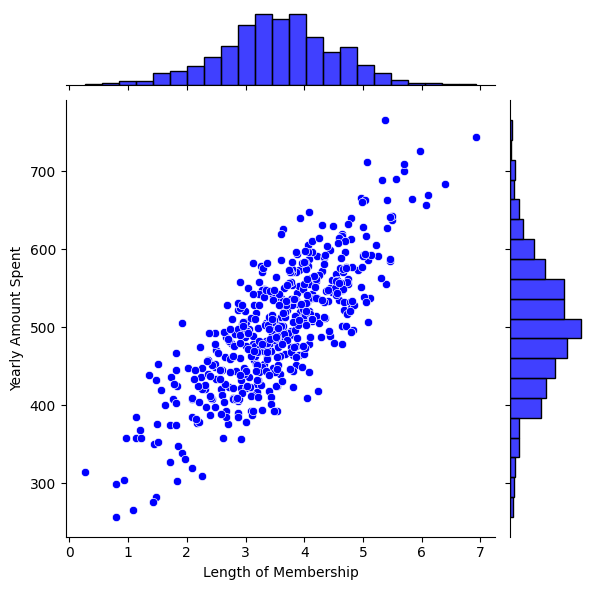

In [11]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=dataset, color='blue')

**Strong Relation** Longer the duration of membership the more cutomer tend to spend.

#### "Lenth of meembership" has the maximum impact on the dependent variable

In [12]:
column_names = dataset.columns.tolist()
print(column_names)

['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


In [13]:
## Feature set - Training and testing data

X = dataset[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] #independent feature
y = dataset['Yearly Amount Spent']

In [14]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [16]:
## Fitting the training data to the model
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
lm.coef_ # So "Length of Membership" has max impact on DV as seen with the maximum coefficient value

array([25.69083176, 38.68815596,  0.45279908, 61.71050259])

## Calculate R^2

In [18]:
## Generate the predictions
predictions = lm.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

0.9806693454258992


## Adjusted R^2

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

1. R2: The R2 of the model
2. n: The number of observations
3. k: The number of predictor variables

In [20]:
#display adjusted R-squared
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9800249902734292

### <span style="color:blue;">Ridge</span>, <span style="color:red;">Lasso</span>, <span style="color:green;">and Elastic Net</span>

In [21]:
import sklearn

In [22]:
# Ridge
from sklearn.linear_model import Ridge
ridgreg = Ridge(alpha=0.001,normalize=True)
ridgreg.fit(X_train,y_train)

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.001, normalize=True)

#### Check the accuracy score w.r.t Ridge

In [23]:
print('R2 value:{}'.format(ridgreg.score(X_test, y_test))) 
# the model.score method ensure we do not need to provide the predictions made by the model 
# externally the predictions are calculated internally using x-test

R2 value:0.980676861070679


In [24]:
# Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001,normalize=True)
lassoreg.fit(X_train,y_train)

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.001, normalize=True)

##### Check the accuracy score w.r.t  Lasso

In [25]:
print('R2 value:{}'.format(lassoreg.score(X_test, y_test))) 

R2 value:0.9806718022062801


In [26]:
# ElasticNet
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.001,normalize=True)
elastic.fit(X_train,y_train)

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


ElasticNet(alpha=0.001, normalize=True)

In [27]:
#### Check the accuracy score w.r.t ElasticNet

In [28]:
print('R2 value:{}'.format(elastic.score(X_test, y_test))) 

R2 value:0.9592611485986487


### Summarize
1. if alpha is **close to Zero**, the ridge term itself is very small and thus the final error is based on RSS alone.
2. if alpha is **too large**, the impact of shrinkage grows and the coefficients beta values tends to zero.